### Event logs exploreation

#### Import event logs

In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

# file_path = '/content/drive/My Drive/AutoML_practice_2024/Practice_12/hospital_log.xes.gz'
file_path = './Hospital Billing - Event Log_1_all/Hospital Billing - Event Log.xes.gz'


In [4]:
# !pip install pm4py --quiet

In [5]:
import pm4py

# Load the .xes.gz file
#event_log = pm4py.read_xes("data/hospital_log.xes.gz")
event_log = pm4py.read_xes(file_path)


/home/ali/.miniforge3/envs/gscan/lib/python3.10/site-packages/pm4py/util/dt_parsing/parser.py:82: UserWarning: ISO8601 strings are not fully supported with strpfromiso for Python versions below 3.11
  warnings.warn(


parsing log, completed traces ::   0%|          | 0/100000 [00:00<?, ?it/s]

In [6]:
import pandas as pd
from pm4py.objects.log.util import dataframe_utils
from pm4py.objects.conversion.log import converter as log_converter
from pm4py.algo.discovery.alpha import algorithm as alpha_miner
from pm4py.visualization.petri_net import visualizer as pn_visualizer

# Convert data to DataFrame
df = pd.DataFrame(event_log)
df

,isCancelled,diagnosis,time:timestamp,caseType,speciality,org:resource,concept:name,blocked,isClosed,flagD,...,lifecycle:transition,case:concept:name,closeCode,actRed,actOrange,flagC,msgCount,version,msgType,msgCode
0,False,A,2012-12-16 19:33:10+00:00,A,A,ResA,NEW,False,True,True,...,complete,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2013-12-15 19:00:37+00:00,NaN,NaN,NaN,FIN,NaN,NaN,NaN,...,complete,A,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,2013-12-16 03:53:38+00:00,NaN,NaN,NaN,RELEASE,NaN,NaN,NaN,...,complete,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,2013-12-17 12:56:29+00:00,NaN,NaN,NaN,CODE OK,NaN,NaN,NaN,...,complete,A,NaN,False,False,False,0.0,A,NaN,NaN
4,NaN,NaN,2013-12-19 03:44:31+00:00,NaN,NaN,ResB,BILLED,NaN,NaN,NaN,...,complete,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
451354,False,OM,2015-12-13 19:31:23+00:00,A,E,ResA,NEW,False,False,False,...,complete,AXQE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
451355,False,NaN,2016-01-14 21:17:47+00:00,B,L,ResDJ,NEW,False,False,False,...,complete,BXQE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
451356,True,NaN,2016-01-14 22:00:13+00:00,NaN,NaN,ResFR,DELETE,NaN,NaN,NaN,...,complete,BXQE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
451357,False,LL,2016-01-11 19:40:47+00:00,A,D,ResA,NEW,False,False,False,...,complete,CXQE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.columns

Index(['isCancelled', 'diagnosis', 'time:timestamp', 'caseType', 'speciality',
       'org:resource', 'concept:name', 'blocked', 'isClosed', 'flagD', 'flagB',
       'flagA', 'state', 'lifecycle:transition', 'case:concept:name',
       'closeCode', 'actRed', 'actOrange', 'flagC', 'msgCount', 'version',
       'msgType', 'msgCode'],
      dtype='object')

In [8]:
df[['case:concept:name','concept:name','time:timestamp']].head(30)

,case:concept:name,concept:name,time:timestamp
0,A,NEW,2012-12-16 19:33:10+00:00
1,A,FIN,2013-12-15 19:00:37+00:00
2,A,RELEASE,2013-12-16 03:53:38+00:00
3,A,CODE OK,2013-12-17 12:56:29+00:00
4,A,BILLED,2013-12-19 03:44:31+00:00
5,B,NEW,2012-12-16 19:33:50+00:00
6,B,DELETE,2013-10-19 12:37:05+00:00
7,C,NEW,2013-01-13 21:04:24+00:00
8,C,FIN,2013-04-17 19:59:43+00:00
9,C,RELEASE,2013-04-18 02:30:35+00:00


In [9]:
# Convert data to DataFrame

# Ensure correct types for PM4Py
df['timestamp'] = pd.to_datetime(df['time:timestamp'])  # Convert to datetime
df = dataframe_utils.convert_timestamp_columns_in_df(df)  # PM4Py utility

log = log_converter.apply(df)

In [10]:
trace = log[1]  ## Print single trace
trace

{'attributes': {'concept:name': 'B'}, 'events': [{'isCancelled': False, 'diagnosis': 'B', 'time:timestamp': Timestamp('2012-12-16 19:33:50+0000', tz='UTC'), 'caseType': 'A', 'speciality': 'A', 'org:resource': 'ResA', 'concept:name': 'NEW', 'blocked': False, 'isClosed': False, 'flagD': False, 'flagB': False, 'flagA': False, 'state': 'In progress', 'lifecycle:transition': 'complete', 'closeCode': nan, 'actRed': nan, 'actOrange': nan, 'flagC': nan, 'msgCount': nan, 'version': nan, 'msgType': nan, 'msgCode': nan, 'timestamp': Timestamp('2012-12-16 19:33:50+0000', tz='UTC')}, '..', {'isCancelled': True, 'diagnosis': nan, 'time:timestamp': Timestamp('2013-10-19 12:37:05+0000', tz='UTC'), 'caseType': nan, 'speciality': nan, 'org:resource': 'ResC', 'concept:name': 'DELETE', 'blocked': nan, 'isClosed': nan, 'flagD': nan, 'flagB': nan, 'flagA': nan, 'state': 'In progress', 'lifecycle:transition': 'complete', 'closeCode': nan, 'actRed': nan, 'actOrange': nan, 'flagC': nan, 'msgCount': nan, 'versi

### Expermient with process mining

In [54]:
# Discover the process model using Alpha Miner
net, initial_marking, final_marking = alpha_miner.apply(log)

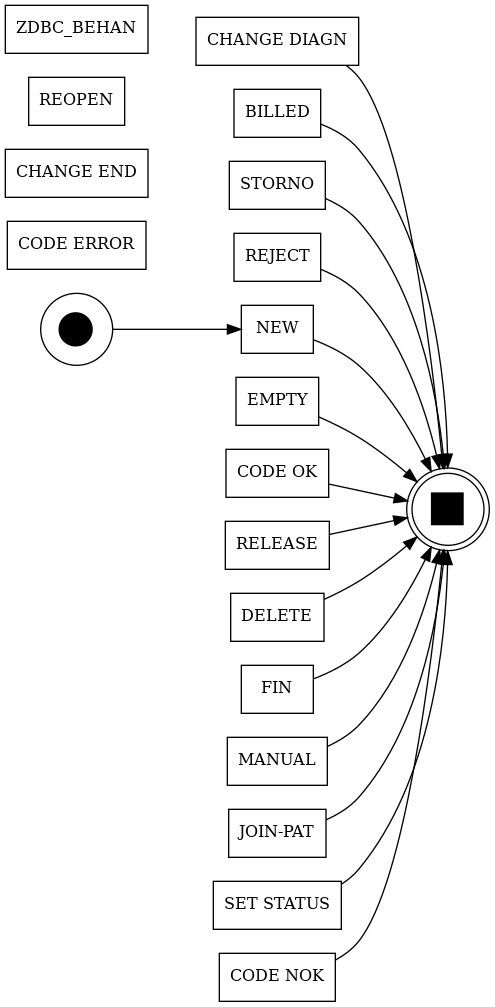

In [12]:
# Visualize the process model
gviz = pn_visualizer.apply(net, initial_marking, final_marking)
pn_visualizer.view(gviz)

In [13]:
df_sel = df[['case:concept:name','concept:name','time:timestamp']]

### Sort based on first column ascending and by timestamp ascending
df_sel = df_sel.sort_values(by=['case:concept:name','time:timestamp'])
df_sel.head(20)

,case:concept:name,concept:name,time:timestamp
0,A,NEW,2012-12-16 19:33:10+00:00
1,A,FIN,2013-12-15 19:00:37+00:00
2,A,RELEASE,2013-12-16 03:53:38+00:00
3,A,CODE OK,2013-12-17 12:56:29+00:00
4,A,BILLED,2013-12-19 03:44:31+00:00
146,AA,NEW,2012-12-26 08:50:18+00:00
147,AA,CHANGE DIAGN,2012-12-26 08:50:59+00:00
148,AA,FIN,2013-02-14 21:06:33+00:00
149,AA,RELEASE,2013-02-14 22:12:10+00:00
150,AA,CODE OK,2013-02-18 01:44:10+00:00


In [57]:
net, initial_marking, final_marking = alpha_miner.apply(event_log)

In [59]:
from hyperopt import hp, fmin, tpe, Trials

from pm4py.algo.discovery.inductive import algorithm as inductive_miner
from pm4py.algo.discovery.alpha import algorithm as alpha_miner
from pm4py.algo.discovery.heuristics import algorithm as heuristics_miner
from pm4py.algo.evaluation.replay_fitness.algorithm import apply  as fitness_evaluator
# Load event log
# log_path = "example.xes"  # Replace with your event log
# event_log = xes_importer.apply(log_path)

def objective(params):
    algorithm = params['algorithm']
    
    try:
        if algorithm == 'inductive_miner':
            # Only use noise_threshold for inductive miner
            noise_threshold = params['noise_threshold']
            net, initial_marking, final_marking = inductive_miner.apply(
                event_log, variant=inductive_miner.Variants.IMf,
                noise_threshold=noise_threshold
            )
        elif algorithm == 'alpha_miner':
            # Alpha miner has no hyperparameters
            net, initial_marking, final_marking = alpha_miner.apply(event_log)
        elif algorithm == 'heuristics_miner':
            # Only use dependency_threshold for heuristics miner
            dependency_threshold = params['dependency_threshold']
            net, initial_marking, final_marking = heuristics_miner.apply(
                event_log, dependency_threshold=dependency_threshold
            )
        
        # Evaluate fitness
        fitness = fitness_evaluator.apply(event_log, net, initial_marking, final_marking, variant=fitness_evaluator.Variants.TOKEN_BASED)
        fitness_value = fitness['log_fitness']
        
        return -fitness_value  # Minimize the negative fitness
    
    except Exception as e:
        print(f"Error with parameters {params}: {e}")
        return 1e6  # High loss for failures
 
# Define search space tailored to each algorithm
search_space = hp.choice('algorithm', [
    {
        'algorithm': 'inductive_miner',
        'noise_threshold': hp.uniform('noise_threshold', 0.0, 1.0)
    },
    {
        'algorithm': 'alpha_miner'
    },
    {
        'algorithm': 'heuristics_miner',
        'dependency_threshold': hp.uniform('dependency_threshold', 0.0, 1.0)
    }
])

# Optimize the search space
trials = Trials()
best_params = fmin(
    fn=objective,
    space=search_space,
    algo=tpe.suggest,
    max_evals=50,
    trials=trials
)

# Output the best parameters
print("Best Parameters:", best_params)

Error with parameters {'algorithm': 'inductive_miner', 'noise_threshold': 0.10684793788587299}: apply() got an unexpected keyword argument 'noise_threshold'
Error with parameters {'algorithm': 'inductive_miner', 'noise_threshold': 0.49247439666850124}: apply() got an unexpected keyword argument 'noise_threshold'
Error with parameters {'algorithm': 'inductive_miner', 'noise_threshold': 0.482760127031691}: apply() got an unexpected keyword argument 'noise_threshold'
Error with parameters {'algorithm': 'inductive_miner', 'noise_threshold': 0.1685185174863535}: apply() got an unexpected keyword argument 'noise_threshold'
Error with parameters {'algorithm': 'inductive_miner', 'noise_threshold': 0.45843410742348234}: apply() got an unexpected keyword argument 'noise_threshold'
Error with parameters {'algorithm': 'inductive_miner', 'noise_threshold': 0.6424451536038572}: apply() got an unexpected keyword argument 'noise_threshold'
Error with parameters {'algorithm': 'inductive_miner', 'noise_